# Imports

In [198]:
#!pip install datasets
from datasets import load_dataset

#import warnings
#warnings.filterwarnings("ignore")

import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
print("Setup Complete")

import numpy as np

Setup Complete


#### Statistiques descriptives

In [175]:
ds = load_dataset("criteo/FairJob")
df = ds['train'].to_pandas()

In [178]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1072226 entries, 0 to 1072225
Data columns (total 56 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   click                1072226 non-null  int64  
 1   protected_attribute  1072226 non-null  int64  
 2   senior               1072226 non-null  int64  
 3   displayrandom        1072226 non-null  int64  
 4   rank                 1072226 non-null  int64  
 5   user_id              1072226 non-null  int64  
 6   impression_id        1072226 non-null  int64  
 7   product_id           1072226 non-null  int64  
 8   cat0                 1072226 non-null  int64  
 9   cat1                 1072226 non-null  int64  
 10  cat2                 1072226 non-null  int64  
 11  cat3                 1072226 non-null  int64  
 12  cat4                 1072226 non-null  int64  
 13  cat5                 1072226 non-null  int64  
 14  cat6                 1072226 non-null  int64  
 15

In [182]:
n_cat_var = len(df.select_dtypes(include=['float64']).columns)
n_num_var = len(df.select_dtypes(include=["int64"]).columns)

print(f'nombre de variables catégoriques : {n_cat_var}')
print(f'nombre de variables numériques : {n_num_var}')

nombre de variables catégoriques : 35
nombre de variables numériques : 21


In [15]:
df.isnull().sum()

click                  0
protected_attribute    0
senior                 0
displayrandom          0
rank                   0
user_id                0
impression_id          0
product_id             0
cat0                   0
cat1                   0
cat2                   0
cat3                   0
cat4                   0
cat5                   0
cat6                   0
cat7                   0
cat8                   0
cat9                   0
cat10                  0
cat11                  0
cat12                  0
num16                  0
num17                  0
num18                  0
num19                  0
num20                  0
num21                  0
num22                  0
num23                  0
num24                  0
num25                  0
num26                  0
num27                  0
num28                  0
num29                  0
num30                  0
num31                  0
num32                  0
num33                  0
num34                  0


Il n'y a aucune valeur manquante

In [17]:
df.head()

,click,protected_attribute,senior,displayrandom,rank,user_id,impression_id,product_id,cat0,cat1,...,num41,num42,num43,num44,num45,num46,num47,num48,num49,num50
0,0,0,1,1,1,31020,175316,45953,6,6,...,-0.333033,-0.542801,0.074884,-0.751637,-0.299223,-0.647541,-0.252768,-0.577173,-0.264359,-0.737299
1,0,0,1,0,3,515,129699,10569,8,8,...,-0.333033,-0.542801,-0.258659,0.503731,-0.523668,1.088225,0.935563,-0.577173,0.507790,0.610287
2,0,1,1,0,1,12859,134573,51550,6,6,...,-0.333033,-0.542801,-0.236209,-0.111510,0.084159,0.422154,-0.160055,-0.577173,-0.264359,-0.063506
3,0,1,1,0,1,18781,84169,17843,3,3,...,-0.333033,-0.542801,-0.393358,-0.987701,-0.523668,-0.778977,-0.345480,-0.577173,4.368537,-0.996450
4,0,0,1,0,9,19283,76506,11354,8,8,...,-0.333033,-0.542801,1.553377,-0.636441,-0.523668,-0.541088,-0.345480,-0.577173,-0.264359,-0.581808


Le dataset est très équilibré. Il va être nécessaire d'utiliser des techniques de resampling.

# Data visualization

répartition de la classe 'click' : 
 No click : 1064737
 Click : 7489

Fréquence de la classe 'click' : 
 No click : 99.3 %
 Click : 0.7 %


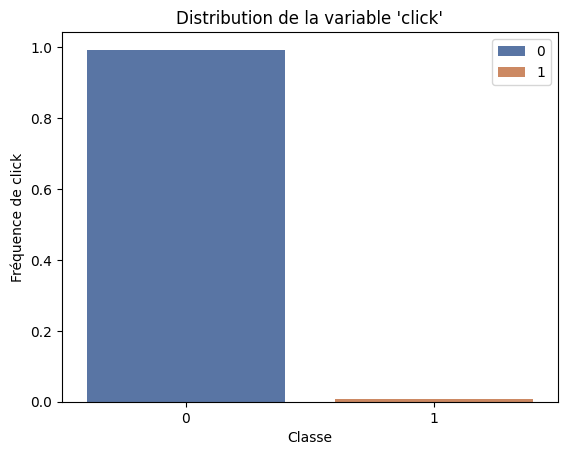

In [249]:
n0, n1 = df['click'].value_counts()
print("répartition de la classe 'click' : ")
print(f' No click : {n0}')
print(f' Click : {n1}')

print("\nFréquence de la classe 'click' : ")
print(f' No click : {round(n0/(n0+n1)*100, 2)} %')
print(f' Click : {round(n1/(n0+n1)*100, 2)} %')


sns.barplot(x = [0,1], y = np.array([n0, n1])/(n0+n1), hue = [0,1], palette='deep',legend=True)
plt.xlabel('Classe')
plt.ylabel('Fréquence de click')
plt.title("Distribution de la variable 'click'")
plt.show()

répartition de la classe 'protected_attribute' : 
 Female : 536113
 Male : 536113

Fréquence de la classe 'click' : 
 Female : 50.0 %
 Male : 50.0 %


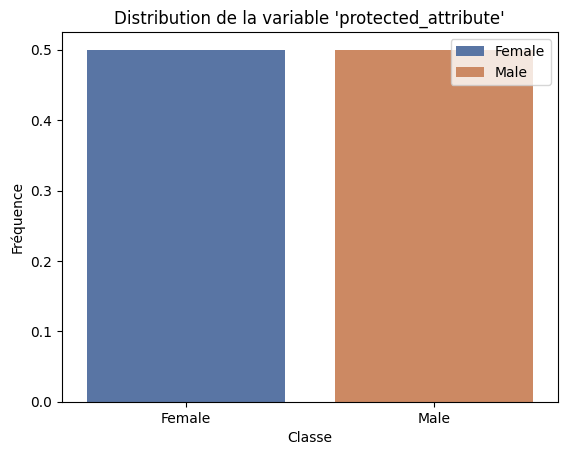

In [229]:
n0, n1 = df['protected_attribute'].value_counts()
print("répartition de la classe 'protected_attribute' : ")
print(f' Female : {n0}')
print(f' Male : {n1}')

print("\nFréquence de la classe 'click' : ")
print(f' Female : {round(n0/(n0+n1)*100, 2)} %')
print(f' Male : {round(n1/(n0+n1)*100, 2)} %')


sns.barplot(x = ['Female','Male'], y = np.array([n0, n1])/(n0+n1), hue = ['Female','Male'], palette='deep',legend=True)
plt.xlabel('Classe')
plt.ylabel('Fréquence')
plt.title("Distribution de la variable 'protected_attribute'")
plt.show()

There is a demographic parity (DP) in the dataset.

protected_attribute       0       1
senior                             
0                    191256  167311
1                    344857  368802


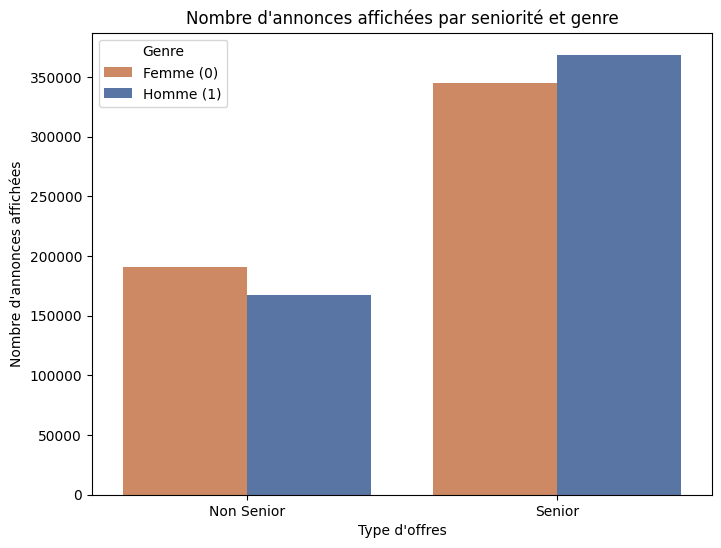

In [248]:
# Création du tableau croisé avec le nombre d'occurrences
tableau = pd.crosstab(index=df["senior"], columns=df["protected_attribute"])
print(tableau)

# Transformation en format long pour Seaborn
tableau_melted = tableau.reset_index().melt(id_vars="senior", var_name="protected_attribute", value_name="count")

# Création du barplot
plt.figure(figsize=(8, 6))
ax = sns.barplot(data=tableau_melted, x="senior", y="count", hue="protected_attribute", palette=["#dd8452", "#4c72b0"])

# Récupérer les handles et labels corrects de la légende
handles, labels = ax.get_legend_handles_labels()

# Remplacement des labels de la légende pour correspondre à "Homme" et "Femme"
plt.legend(handles=handles, labels=["Femme (0)", "Homme (1)"], title="Genre")
plt.xlabel("Type d'offres")
plt.ylabel("Nombre d'annonces affichées")
plt.title("Nombre d'annonces affichées par seniorité et genre")
plt.xticks(ticks=[0, 1], labels=["Non Senior", "Senior"])  # Noms des groupes

# Affichage
plt.show()


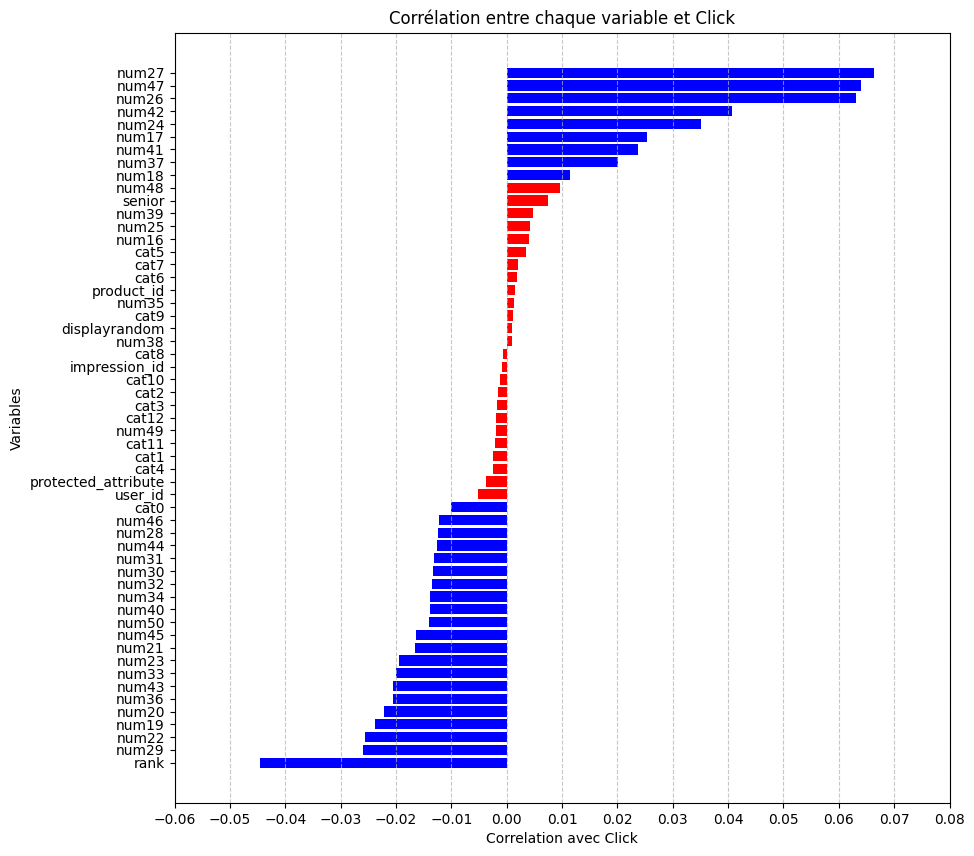

In [301]:
# Création du DataFrame
corr_mat = df.corr()
click_corr = corr_mat['click'].drop('click')
s_sorted = click_corr.loc[click_corr.abs().sort_values().index]
s_sorted = s_sorted.sort_values()

colors = ['red' if abs(c) < 0.01 else 'blue' for c in s_sorted.values]

# Création du graphique
plt.figure(figsize=(10, 10))
plt.barh(s_sorted.index, s_sorted.values, color=colors)
plt.xlabel('Correlation avec Click')
plt.ylabel('Variables')
plt.title('Corrélation entre chaque variable et Click')
plt.grid(axis='x', linestyle='--', alpha=0.7)

xmin, xmax = plt.xlim()
xticks = np.arange(np.floor(xmin * 100) / 100, np.ceil(xmax * 100) / 100, 0.01)
plt.xticks(xticks)

# Affichage
plt.show()

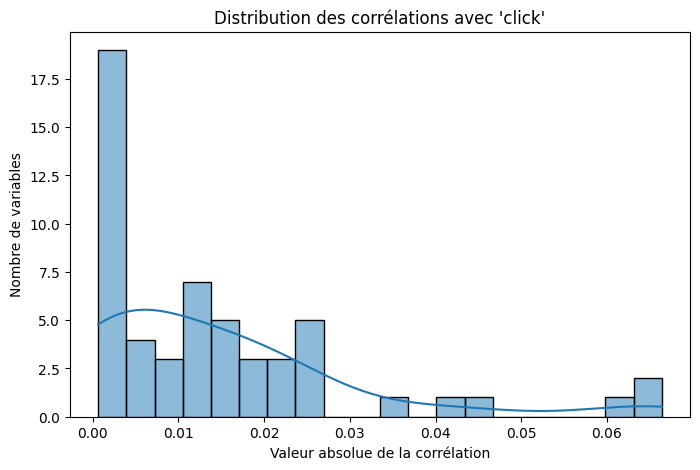

In [257]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.histplot(click_corr.abs(), bins=20, kde=True)
plt.xlabel("Valeur absolue de la corrélation")
plt.ylabel("Nombre de variables")
plt.title("Distribution des corrélations avec 'click'")
plt.show()


In [259]:
click_corr_spearman = df.corr(method="spearman")["click"].drop("click")
print(click_corr_spearman.sort_values(ascending=False).head(10))

num27    0.065470
num26    0.063325
num47    0.062483
num18    0.035378
num17    0.035231
num42    0.034656
num41    0.033017
num24    0.029481
num37    0.028010
num28    0.011403
Name: click, dtype: float64


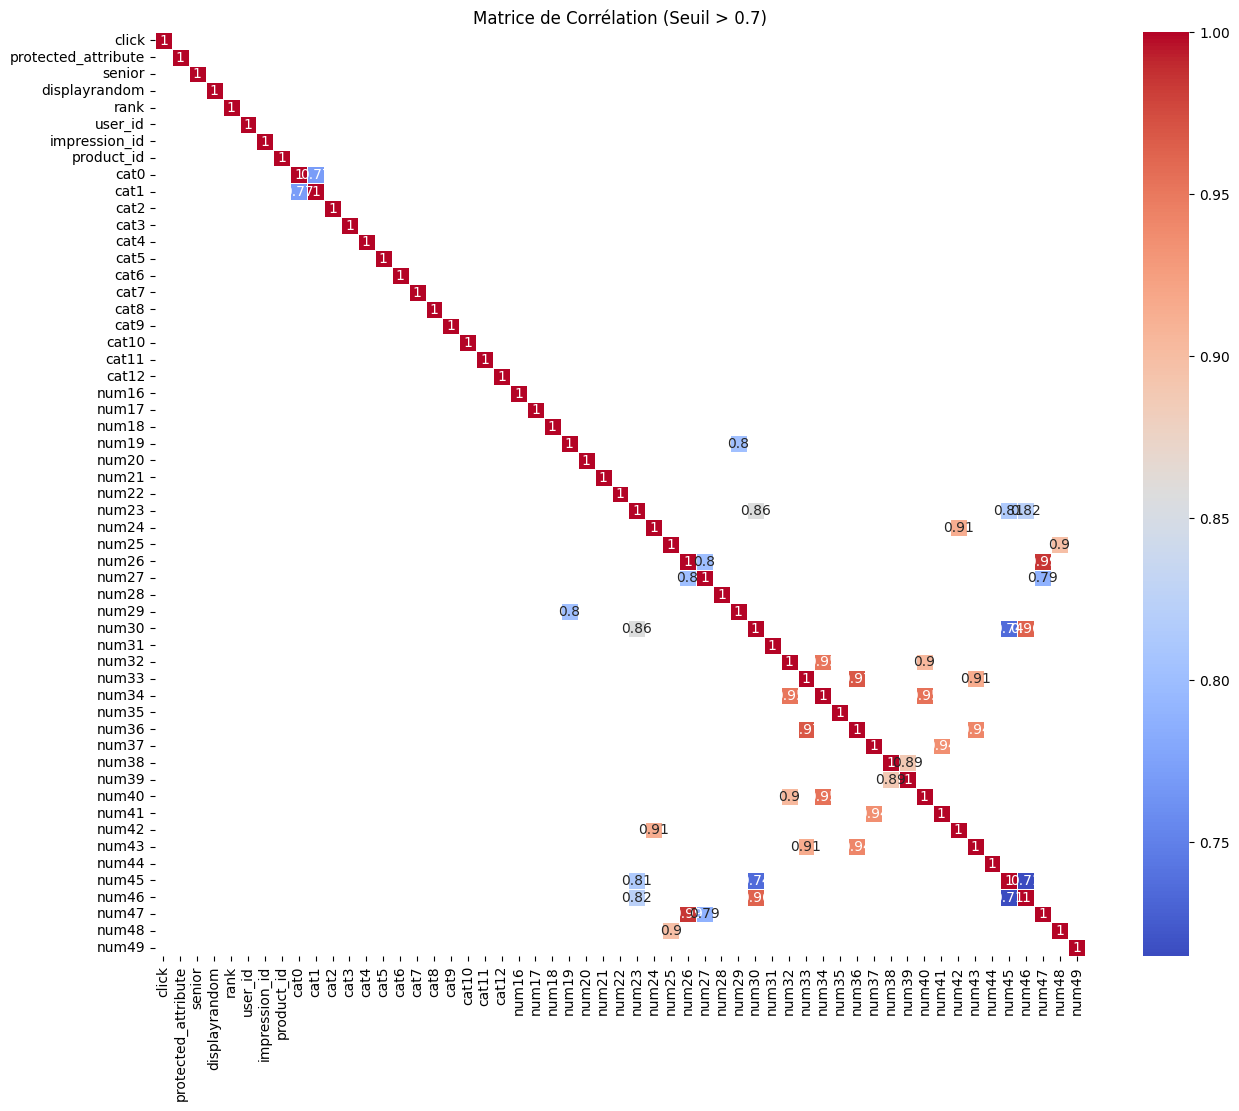

In [267]:
mat = df_resampled.corr()

mask = np.abs(mat) < 0.7

plt.figure(figsize=(15,12))
sns.heatmap(mat, mask=mask, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Matrice de Corrélation (Seuil > 0.7)")
plt.show()

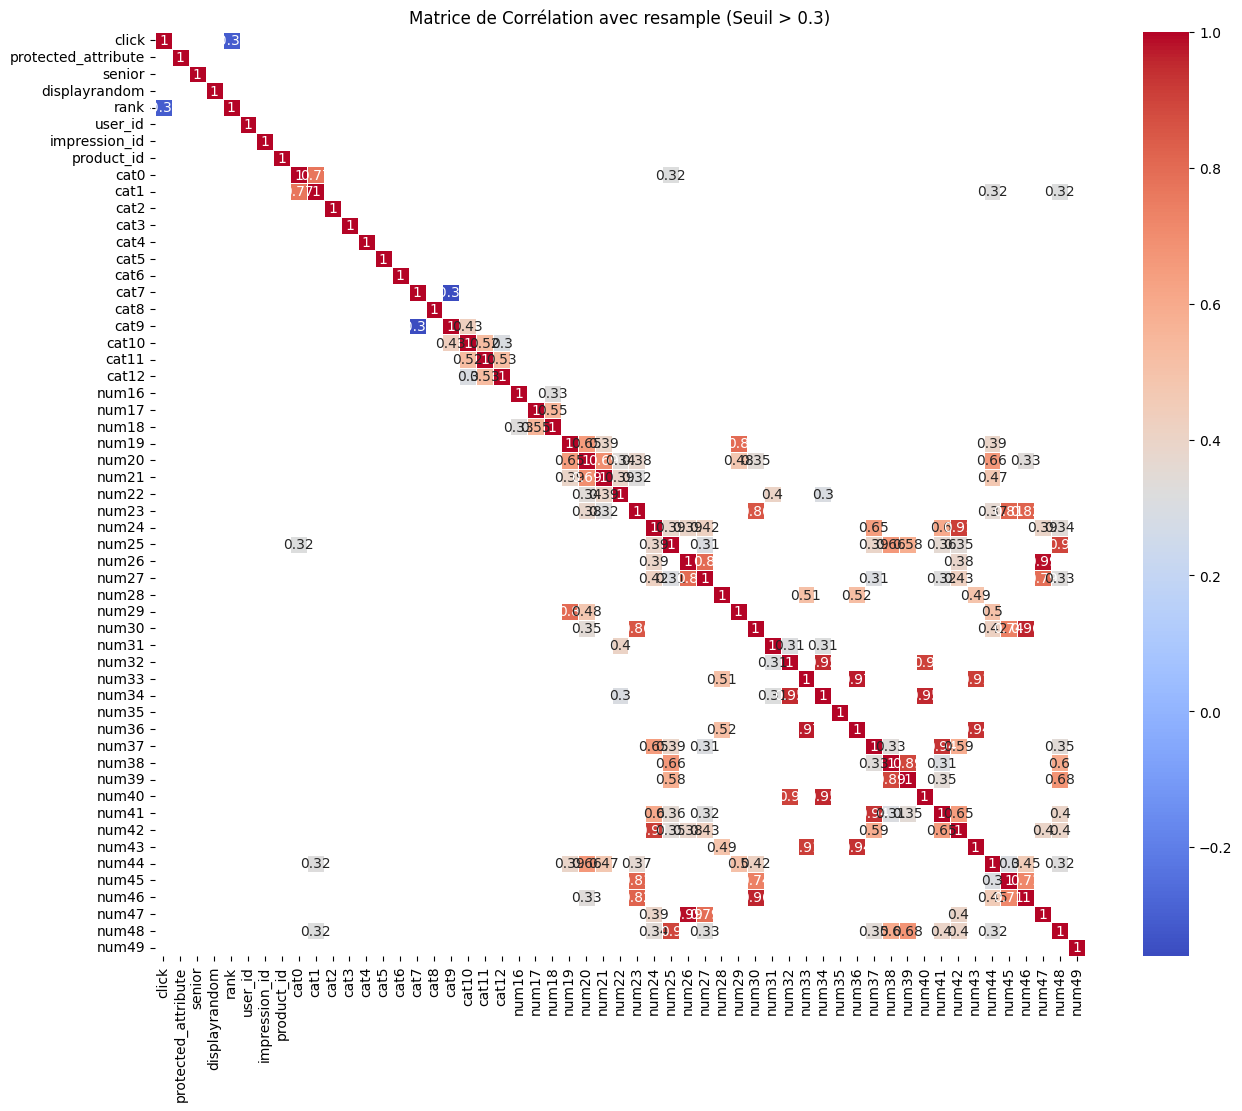

In [273]:
mask = np.abs(mat) < 0.3

plt.figure(figsize=(15,12))
sns.heatmap(mat, mask=mask, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Matrice de Corrélation avec resample (Seuil > 0.3)")
plt.show()

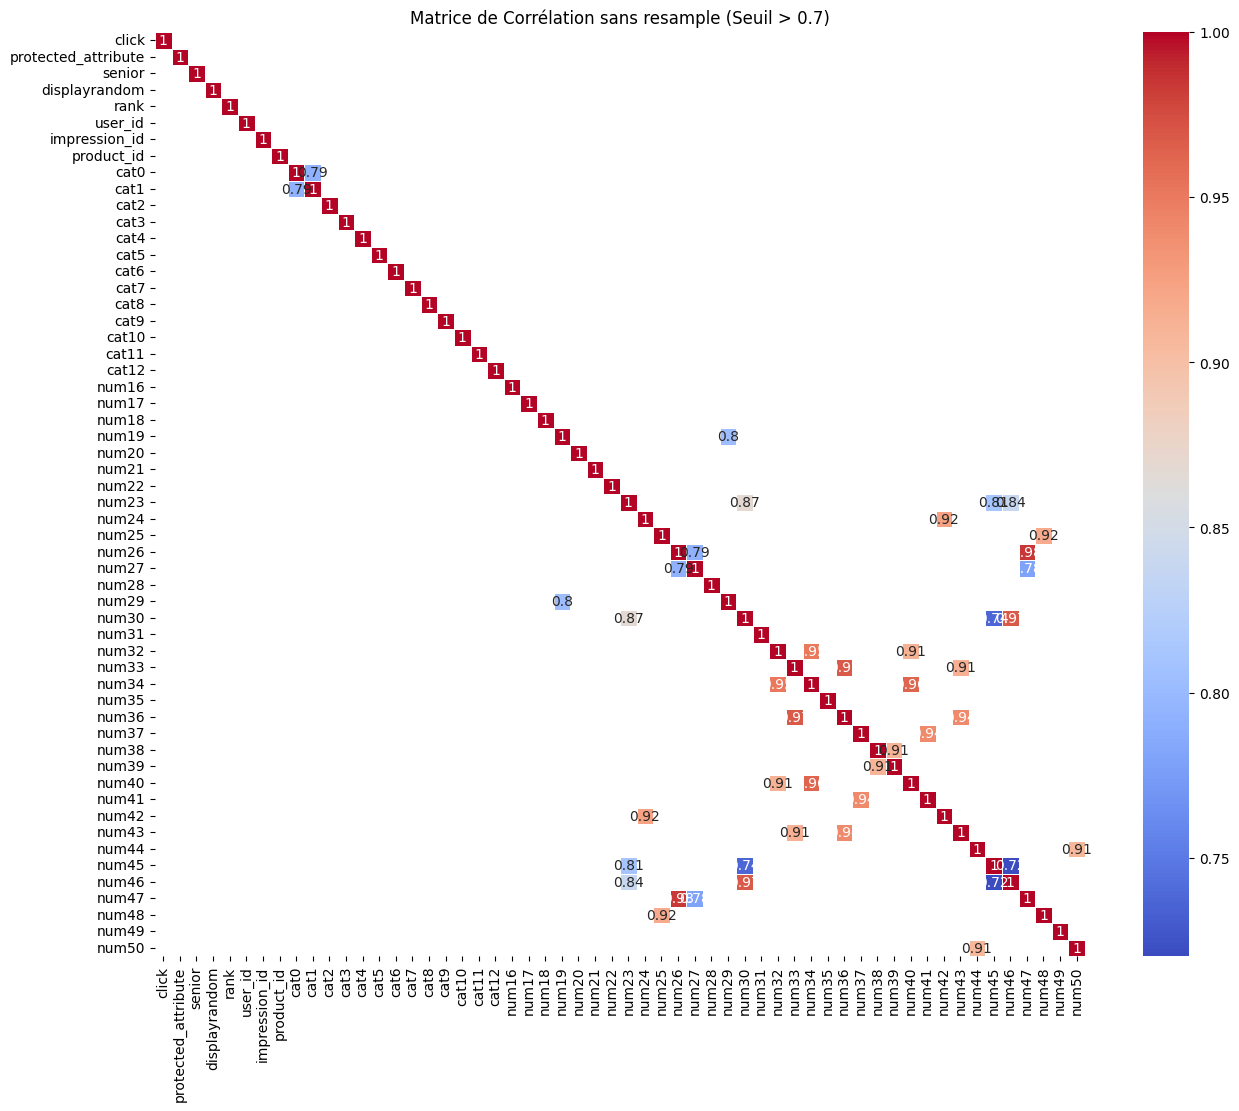

In [274]:
import numpy as np

# Masquer les valeurs faibles pour mieux voir les corrélations importantes
mask = np.abs(df.corr()) < 0.7

plt.figure(figsize=(15,12))
sns.heatmap(df.corr(), mask=mask, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Matrice de Corrélation sans resample (Seuil > 0.7)")
plt.show()


In [56]:
df.columns

Index(['click', 'protected_attribute', 'senior', 'displayrandom', 'rank',
       'user_id', 'impression_id', 'product_id', 'cat0', 'cat1', 'cat2',
       'cat3', 'cat4', 'cat5', 'cat6', 'cat7', 'cat8', 'cat9', 'cat10',
       'cat11', 'cat12', 'num16', 'num17', 'num18', 'num19', 'num20', 'num21',
       'num22', 'num23', 'num24', 'num25', 'num26', 'num27', 'num28', 'num29',
       'num30', 'num31', 'num32', 'num33', 'num34', 'num35', 'num36', 'num37',
       'num38', 'num39', 'num40', 'num41', 'num42', 'num43', 'num44', 'num45',
       'num46', 'num47', 'num48', 'num49', 'num50'],
      dtype='object')

In [39]:
# Matrice de corrélation avec la variable cible 'click'
correlation_matrix = df.corr()
target_correlations = correlation_matrix["click"].drop("click").sort_values(key=abs, ascending=False)

# Convertir en DataFrame pour affichage
target_correlation_df = target_correlations.reset_index()
target_correlation_df.columns = ["Variable", "Corrélation"]

target_correlation_df.head(10)

,Variable,Corrélation
0,num27,0.066402
1,num47,0.064028
2,num26,0.063016
3,rank,-0.044521
4,num42,0.040700
5,num24,0.035119
6,num29,-0.026038
7,num22,-0.025658
8,num17,0.025357
9,num19,-0.023837


In [37]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[num_columns] = scaler.fit_transform(df[num_columns])


In [54]:
cat_columns = df.drop(columns=['click','product_id', 'user_id', 'impression_id']).select_dtypes(include=["int64"]).columns
print(cat_columns)

Index(['protected_attribute', 'senior', 'displayrandom', 'rank', 'cat0',
       'cat1', 'cat2', 'cat3', 'cat4', 'cat5', 'cat6', 'cat7', 'cat8', 'cat9',
       'cat10', 'cat11', 'cat12'],
      dtype='object')


In [55]:
for col in cat_columns:  # Remplace par tes colonnes catégoriques
    print(f"\nVariable: {col}")
    print(df.groupby(col)['click'].mean())


Variable: protected_attribute
protected_attribute
0    0.007293
1    0.006676
Name: click, dtype: float64

Variable: senior
senior
0    0.006110
1    0.007424
Name: click, dtype: float64

Variable: displayrandom
displayrandom
0    0.006957
1    0.007235
Name: click, dtype: float64

Variable: rank
rank
1     0.019009
2     0.006994
3     0.006445
4     0.006760
5     0.005629
6     0.004623
7     0.005084
8     0.005432
9     0.002447
10    0.003140
11    0.002179
12    0.002359
13    0.002656
14    0.001672
15    0.001507
16    0.002567
17    0.003745
18    0.004418
19    0.003863
20    0.002110
21    0.000699
22    0.000000
23    0.000000
24    0.000000
25    0.000000
26    0.001185
27    0.000000
28    0.000000
29    0.000000
30    0.000000
31    0.000000
32    0.000000
33    0.000000
34    0.000000
35    0.000000
36    0.000000
37    0.000000
38    0.000000
39    0.000000
40    0.000000
Name: click, dtype: float64

Variable: cat0
cat0
0    0.010816
1    0.003744
2    0.004014
3    

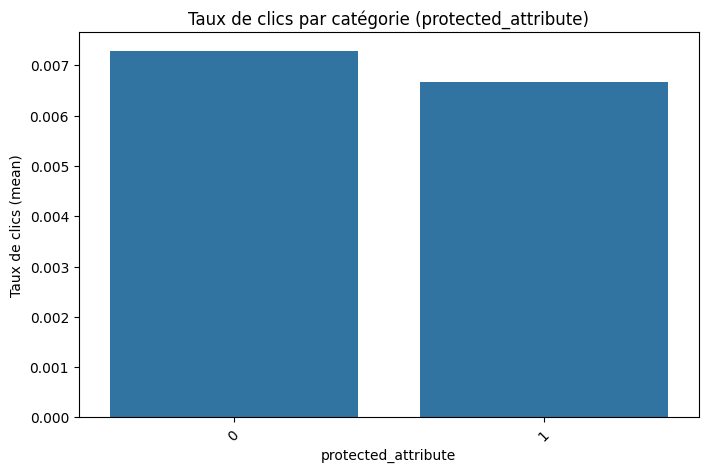

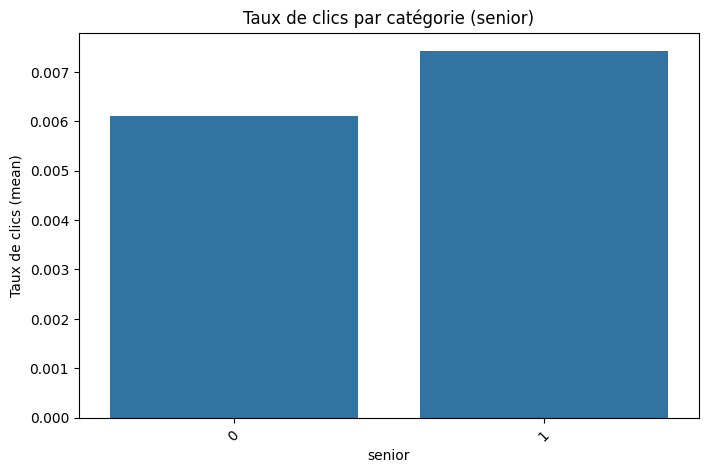

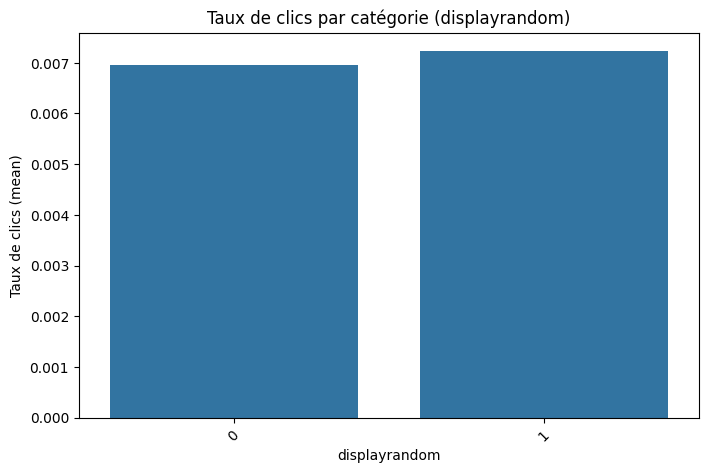

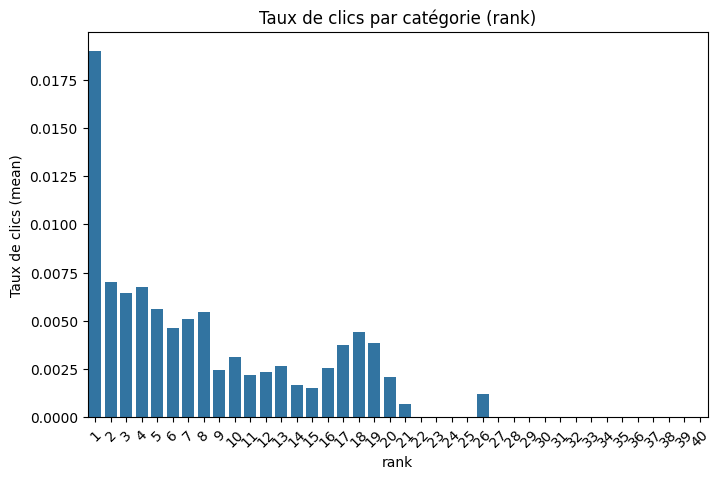

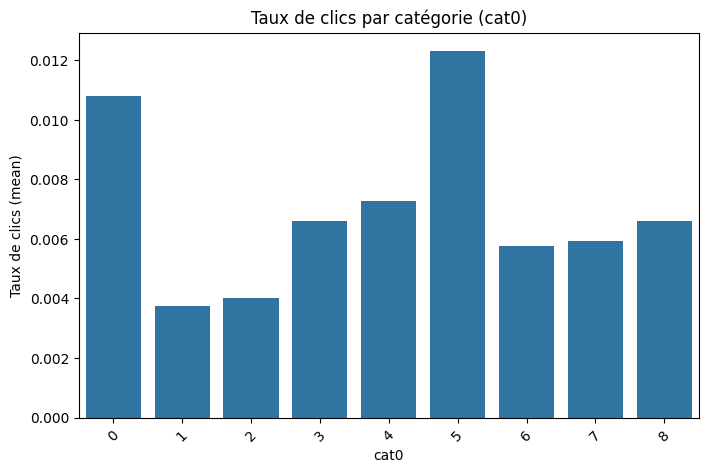

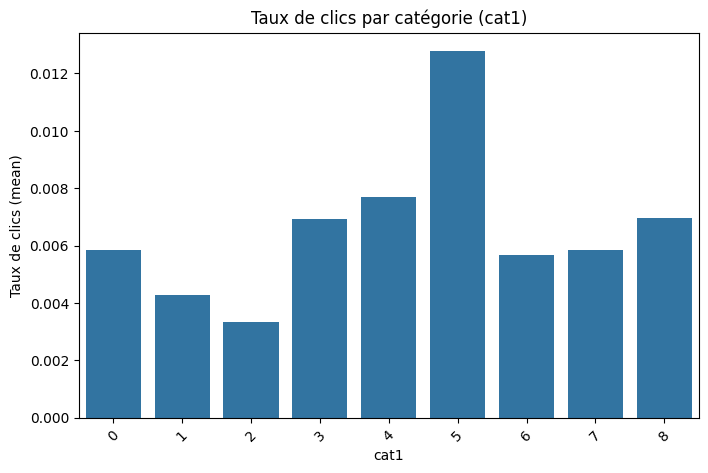

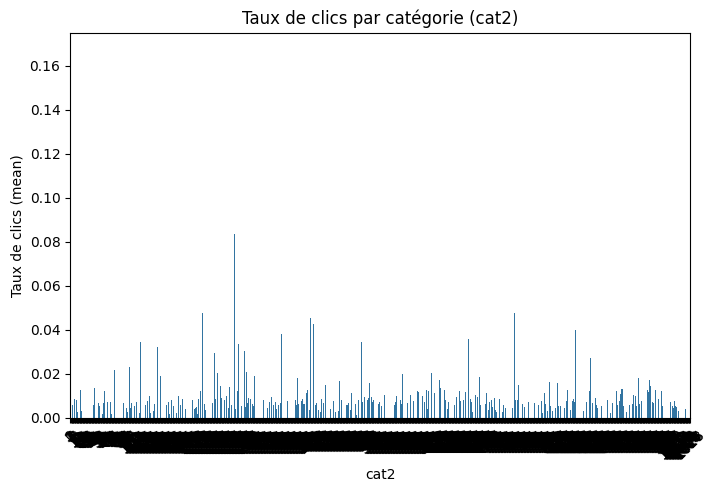

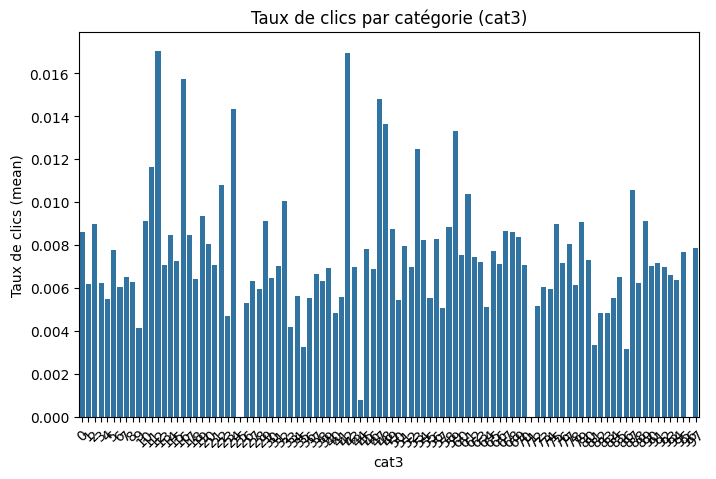

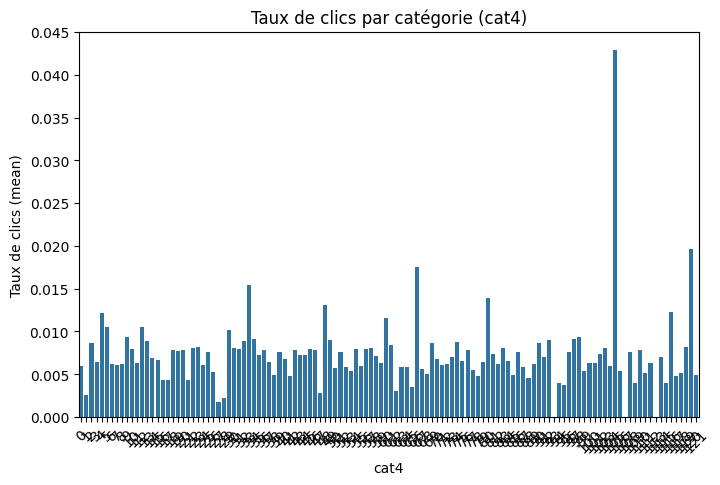

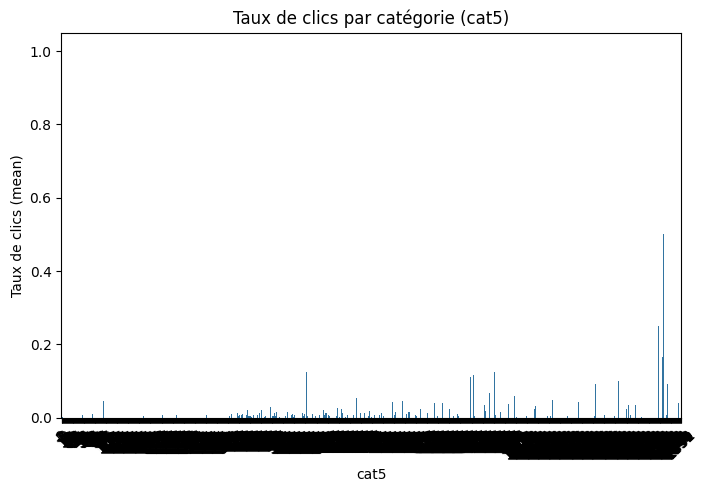

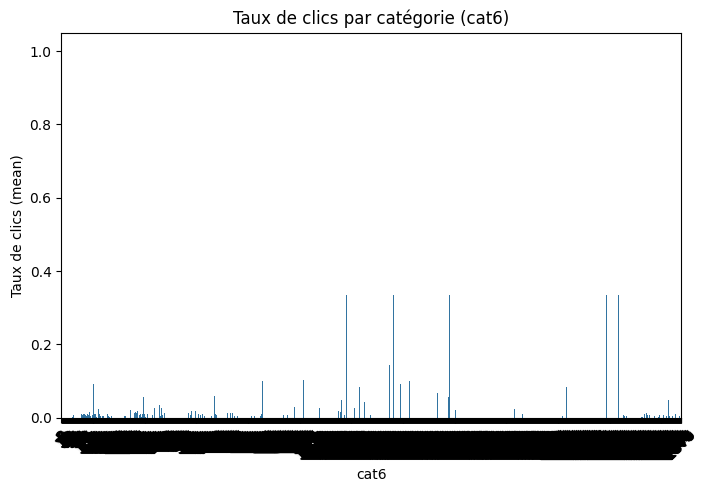

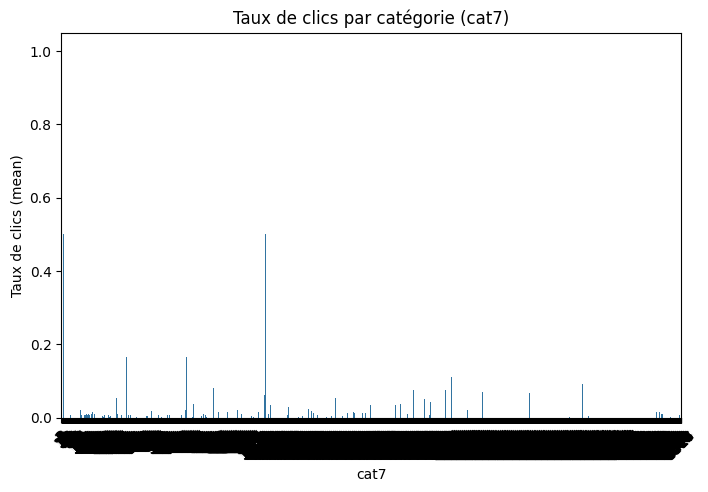

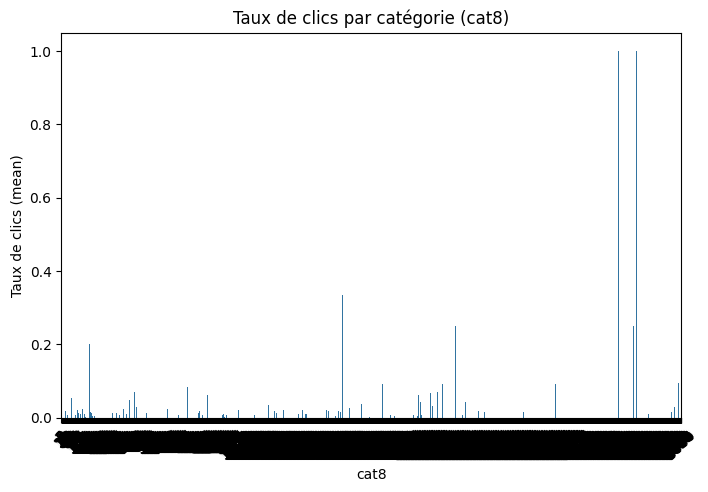

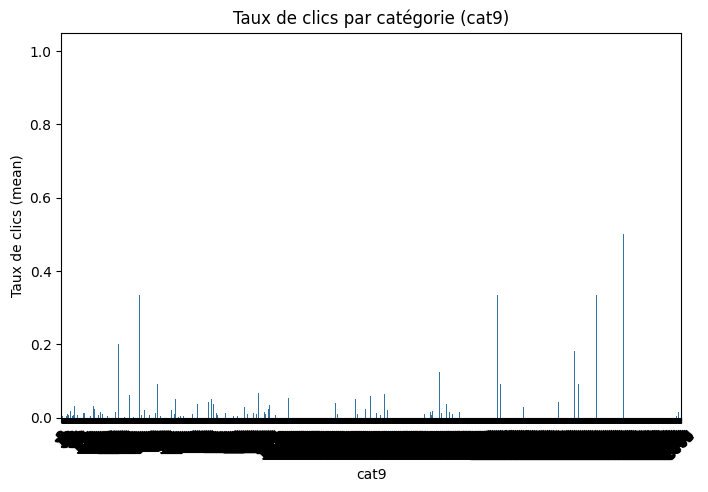

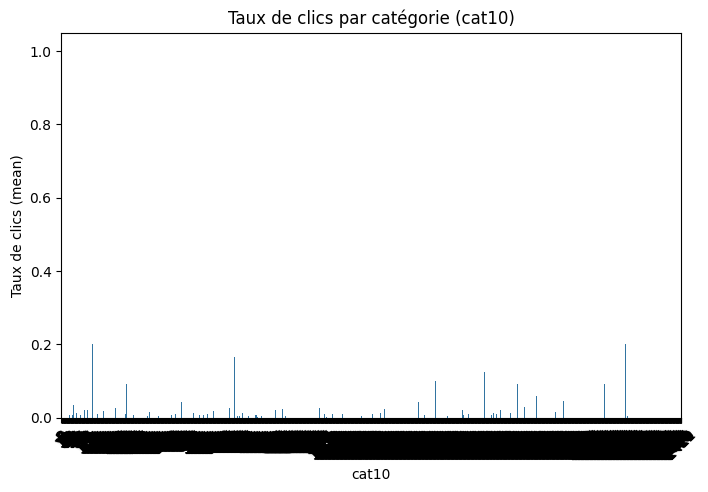

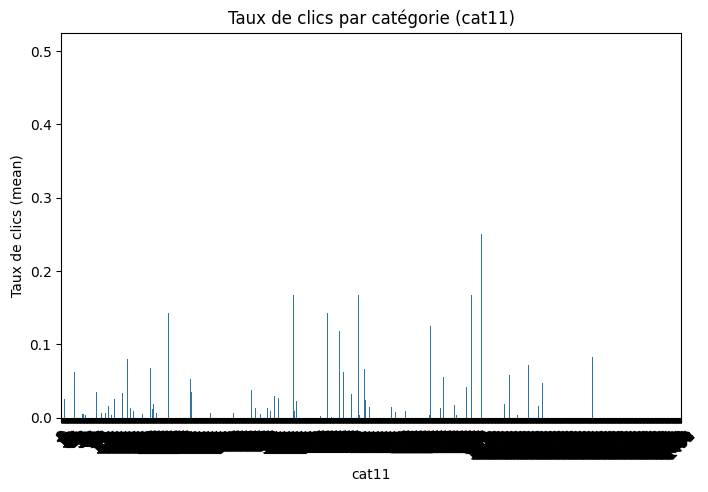

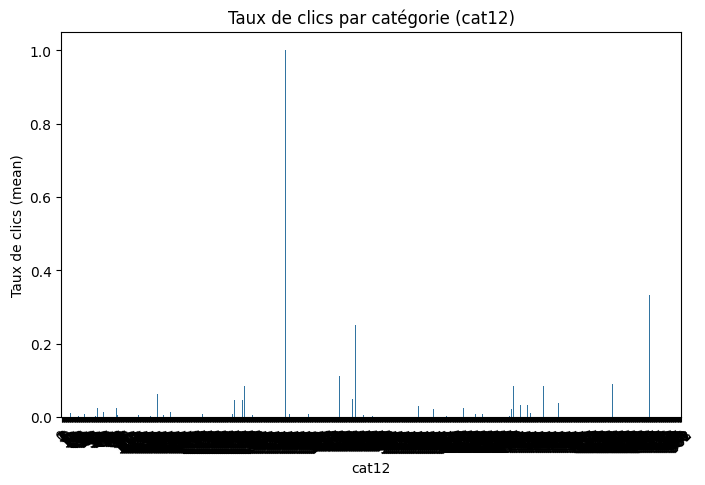

In [58]:
import seaborn as sns
import matplotlib.pyplot as plt

for col in cat_columns:  # Remplace par tes colonnes
    plt.figure(figsize=(8, 5))
    sns.barplot(x=col, y='click', data=df, ci=None)  # Moyenne de `click` par catégorie
    plt.title(f"Taux de clics par catégorie ({col})")
    plt.ylabel("Taux de clics (mean)")
    plt.xlabel(col)
    plt.xticks(rotation=45)
    plt.show()

# Feature Selection

In [8]:
cols_to_drop = ['user_id', 'impression_id', 'product_id']  # Identifiants inutiles

df = ds['train'].to_pandas()
df = df.drop(columns=cols_to_drop)

In [9]:
import numpy as np

# Calcul de la matrice de corrélation
correlation_matrix = df.corr()

# Trouver les paires de variables corrélées (au-dessus d'un seuil)
correlated_features = set()
threshold = 0.85  # Seuil de corrélation

for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            colname = correlation_matrix.columns[i]
            correlated_features.add(colname)

In [10]:
print(correlated_features)

{'num43', 'num47', 'num30', 'num40', 'num50', 'num48', 'num39', 'num41', 'num42', 'num34', 'num36', 'num46'}


In [11]:
# Supprimer les variables fortement corrélées
df = df.drop(columns=correlated_features)
print(f"Variables supprimées pour forte corrélation: {correlated_features}")

Variables supprimées pour forte corrélation: {'num43', 'num47', 'num30', 'num40', 'num50', 'num48', 'num39', 'num41', 'num42', 'num34', 'num36', 'num46'}


In [12]:
cat_columns = df.select_dtypes(include=['int64']).columns

In [13]:
print(cat_columns)

Index(['click', 'protected_attribute', 'senior', 'displayrandom', 'rank',
       'cat0', 'cat1', 'cat2', 'cat3', 'cat4', 'cat5', 'cat6', 'cat7', 'cat8',
       'cat9', 'cat10', 'cat11', 'cat12'],
      dtype='object')


In [14]:
for col in cat_columns:
    if df[col].nunique()!=2:
        print(f"{col}: {df[col].nunique()} catégories uniques")


rank: 40 catégories uniques
cat0: 9 catégories uniques
cat1: 9 catégories uniques
cat2: 1025 catégories uniques
cat3: 98 catégories uniques
cat4: 122 catégories uniques
cat5: 1296 catégories uniques
cat6: 2492 catégories uniques
cat7: 3183 catégories uniques
cat8: 3541 catégories uniques
cat9: 2879 catégories uniques
cat10: 2314 catégories uniques
cat11: 1436 catégories uniques
cat12: 912 catégories uniques


In [15]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

# Variables à encoder en One-Hot
small_cat_columns = ['rank', 'cat0', 'cat1']

# Appliquer One-Hot Encoding (avec drop_first pour éviter la multicolinéarité)
df = pd.get_dummies(df, columns=small_cat_columns, drop_first=True)

print("One-Hot Encoding appliqué aux variables:", small_cat_columns)
print(df.shape)  # Vérifier la taille du dataset après encodage


One-Hot Encoding appliqué aux variables: ['rank', 'cat0', 'cat1']
(1072226, 93)


In [16]:
for col in ['cat2', 'cat3', 'cat4', 'cat5', 'cat6', 'cat7', 'cat8', 'cat9', 'cat10', 'cat11', 'cat12']:
    mean_encoded = df.groupby(col)['click'].mean()
    df[col] = df[col].map(mean_encoded)

print("Target Encoding appliqué aux variables avec trop de catégories.")


Target Encoding appliqué aux variables avec trop de catégories.


In [17]:
df.shape

(1072226, 93)

In [18]:
print(df.dtypes[df.dtypes == 'object'])  # Vérifie s'il reste des colonnes catégoriques

Series([], dtype: object)


In [19]:
X = df.drop(columns=['click'])  # Features
y = df['click']  # Target

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Séparer les features et la target
X = df.drop(columns=['click'])
y = df['click']

# Division en train/test (80%-20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Standardiser uniquement pour la Régression Logistique
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


## Dummy Classifier

In [71]:
from sklearn.utils import resample
import numpy as np

# Séparer les classes
X_0 = X[y == 0]  # Classe majoritaire (0)
X_1 = X[y == 1]  # Classe minoritaire (1)
y_0 = y[y == 0]
y_1 = y[y == 1]

# Taille cible pour la classe 0 afin d'obtenir 90% de classe 0 et 10% de classe 1
perc_classe_0 = 90
target_size_0 = int(len(y_1) * (perc_classe_0/(100-perc_classe_0)))  # 9 fois la taille de la classe 1

# Sous-échantillonnage de la classe 0
X_0_resampled, y_0_resampled = resample(X_0, y_0,
                                        replace=False,  # Pas de remplacement, on réduit la classe 0
                                        n_samples=target_size_0,  # Taille cible pour avoir un ratio 90%-10%
                                        random_state=42)

# Fusion des nouvelles classes équilibrées
X_resampled = np.vstack((X_0_resampled, X_1))
y_resampled = np.concatenate((y_0_resampled, y_1))

# Vérification des proportions
unique, counts = np.unique(y_resampled, return_counts=True)
print("Distribution après sous-échantillonnage :", dict(zip(unique, counts)))


Distribution après sous-échantillonnage : {np.int64(0): np.int64(67401), np.int64(1): np.int64(7489)}


In [72]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score, classification_report

#X = df.drop(columns=['click'])
#y = df['click']

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled)

dummy_model = DummyClassifier(strategy='stratified')
dummy_model.fit(X_train, y_train)

y_pred_dummy = dummy_model.predict(X_test)
print(classification_report(y_test, y_pred_dummy))
print(accuracy_score(y_test, y_pred_dummy))

              precision    recall  f1-score   support

           0       0.90      0.90      0.90     13480
           1       0.10      0.10      0.10      1498

    accuracy                           0.82     14978
   macro avg       0.50      0.50      0.50     14978
weighted avg       0.82      0.82      0.82     14978

0.8216050206970223


In [26]:
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import accuracy_score, classification_report
import numpy as np

X = df.drop(columns=['click'])
y = df['click']

# Séparation train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# Calcul des poids de classe
class_weights = compute_class_weight(class_weight="balanced", classes=np.array([0,1]), y=y)
w_0, w_1 = class_weights  # w_0 < w_1, donc on va réduire la classe 0

# Séparer les classes
X_train_0 = X_train[y_train == 0]
X_train_1 = X_train[y_train == 1]
y_train_0 = y_train[y_train == 0]
y_train_1 = y_train[y_train == 1]


In [28]:
# Sous-échantillonnage de la classe majoritaire (0)

ratio = min(len(y_train_1) * (w_0 / w_1), len(y_train_0) * 0.5)
X_train_0_resampled, y_train_0_resampled = resample(X_train_0, y_train_0,
                                                     replace=False,  # Pas de remplacement (sous-échantillonnage)
                                                     n_samples=int(ratio),  # Réduction de la classe 0
                                                     random_state=42)



In [29]:
# Fusion des classes après sous-échantillonnage
X_train_balanced = np.vstack((X_train_0_resampled, X_train_1))
y_train_balanced = np.concatenate((y_train_0_resampled, y_train_1))

In [30]:
# Création du Dummy Classifier (avec strategy="stratified")
dummy_model = DummyClassifier(strategy="stratified", random_state=42)
dummy_model.fit(X_train_balanced, y_train_balanced)

DummyClassifier(random_state=42, strategy='stratified')

In [31]:
# Prédictions
y_pred_dummy = dummy_model.predict(X_test)

# Vérification des proportions des prédictions
unique, counts = np.unique(y_pred_dummy, return_counts=True)
print(dict(zip(unique, counts)))

{np.int64(0): np.int64(1487), np.int64(1): np.int64(212959)}


In [33]:
print(classification_report(y_test,y_pred_dummy))
print(accuracy_score(y_test,y_pred_dummy))

              precision    recall  f1-score   support

           0       0.99      0.01      0.01    212948
           1       0.01      0.99      0.01      1498

    accuracy                           0.01    214446
   macro avg       0.50      0.50      0.01    214446
weighted avg       0.98      0.01      0.01    214446

0.013761040075356966


## XGBoost

In [302]:
import xgboost
print(xgboost.__version__)  # Devrait afficher la version installée


2.1.3


In [303]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialiser le modèle XGBoost
xgb_model = XGBClassifier(
    n_estimators=100, max_depth=5, learning_rate=0.1, 
    random_state=42, use_label_encoder=False, eval_metric='logloss')

# Entraîner le modèle
xgb_model.fit(X_train, y_train)

# Prédictions
y_pred_xgb = xgb_model.predict(X_test)

# Évaluation
print("🔹 XGBoost Results:")
print(classification_report(y_test, y_pred_xgb))
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))


[14:53:36] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.



🔹 XGBoost Results:
              precision    recall  f1-score   support

           0       0.80      0.69      0.74      1121
           1       0.79      0.87      0.83      1498

    accuracy                           0.79      2619
   macro avg       0.79      0.78      0.78      2619
weighted avg       0.79      0.79      0.79      2619

Accuracy: 0.7926689576174112


1. Le modèle prédit bien `click=0`, mais très mal `click=1`.
- Il préfère prédire `0` tout le temps, car c'est plus "sûr" vu le déséquilibre des classes.

2. Le Recall sur `click=1` est 0.00 → ❌ Problème critique.
- Cela signifie que XGBoost ne trouve aucun vrai clic.

3. La précision (`precision`) sur `click=1` est 0.50, ce qui est moyen.
- Cela veut dire que sur les rares cas où il prédit `1`, il se trompe une fois sur deux.

In [304]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialiser le modèle XGBoost
xgb_model = XGBClassifier(
    n_estimators=100, max_depth=5, learning_rate=0.1,
    scale_pos_weight=(len(y_train) - sum(y_train)) / sum(y_train),  # Ajustement du poids
    random_state=42, use_label_encoder=False, eval_metric='logloss'
)

# Entraîner le modèle
xgb_model.fit(X_train, y_train)

# Prédictions
y_pred_xgb = xgb_model.predict(X_test)

# Évaluation
print("🔹 XGBoost Results:")
print(classification_report(y_test, y_pred_xgb))
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))


[14:53:36] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.



🔹 XGBoost Results:
              precision    recall  f1-score   support

           0       0.76      0.74      0.75      1121
           1       0.81      0.83      0.82      1498

    accuracy                           0.79      2619
   macro avg       0.79      0.78      0.79      2619
weighted avg       0.79      0.79      0.79      2619

Accuracy: 0.7907598319969454


Le modèle détecte bien les vrais clics → Recall (click=1) = 80%

👉 Cela signifie que parmi tous les vrais click=1, il en trouve 80%.

Mais il prédit trop de faux clics → Précision (click=1) = 2%

👉 Cela signifie que sur toutes les fois où il dit click=1, il se trompe 98% du temps.

In [305]:
(len(y_train) - sum(y_train)) / sum(y_train)

np.float64(0.7481221832749124)

In [306]:
for scale in [1, 5, 20, 50, 100, 200]:
    # Initialiser le modèle XGBoost
    xgb_model = XGBClassifier(
        n_estimators=100, max_depth=5, learning_rate=0.1,
        scale_pos_weight=scale,  # Ajustement du poids
        random_state=42, use_label_encoder=False, eval_metric='logloss'
    )

    # Entraîner le modèle
    xgb_model.fit(X_train, y_train)

    # Prédictions
    y_pred_xgb = xgb_model.predict(X_test)

    # Évaluation
    print(f"🔹 XGBoost Results with scale_pos_weight = {scale}:")
    print(classification_report(y_test, y_pred_xgb))
    print("Accuracy:", accuracy_score(y_test, y_pred_xgb))


[14:53:37] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.



🔹 XGBoost Results with scale_pos_weight = 1:
              precision    recall  f1-score   support

           0       0.80      0.69      0.74      1121
           1       0.79      0.87      0.83      1498

    accuracy                           0.79      2619
   macro avg       0.79      0.78      0.78      2619
weighted avg       0.79      0.79      0.79      2619

Accuracy: 0.7926689576174112


[14:53:37] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.



🔹 XGBoost Results with scale_pos_weight = 5:
              precision    recall  f1-score   support

           0       0.92      0.40      0.56      1121
           1       0.68      0.97      0.80      1498

    accuracy                           0.73      2619
   macro avg       0.80      0.69      0.68      2619
weighted avg       0.78      0.73      0.70      2619

Accuracy: 0.7281405116456663


[14:53:38] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.



🔹 XGBoost Results with scale_pos_weight = 20:
              precision    recall  f1-score   support

           0       0.96      0.29      0.44      1121
           1       0.65      0.99      0.79      1498

    accuracy                           0.69      2619
   macro avg       0.80      0.64      0.61      2619
weighted avg       0.78      0.69      0.64      2619

Accuracy: 0.6899579992363497


[14:53:38] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.



🔹 XGBoost Results with scale_pos_weight = 50:
              precision    recall  f1-score   support

           0       0.94      0.26      0.41      1121
           1       0.64      0.99      0.78      1498

    accuracy                           0.68      2619
   macro avg       0.79      0.62      0.59      2619
weighted avg       0.77      0.68      0.62      2619

Accuracy: 0.6769759450171822


[14:53:38] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.



🔹 XGBoost Results with scale_pos_weight = 100:
              precision    recall  f1-score   support

           0       0.96      0.24      0.38      1121
           1       0.64      0.99      0.77      1498

    accuracy                           0.67      2619
   macro avg       0.80      0.62      0.58      2619
weighted avg       0.77      0.67      0.61      2619

Accuracy: 0.669721267659412


[14:53:39] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.



🔹 XGBoost Results with scale_pos_weight = 200:
              precision    recall  f1-score   support

           0       0.97      0.23      0.37      1121
           1       0.63      0.99      0.77      1498

    accuracy                           0.67      2619
   macro avg       0.80      0.61      0.57      2619
weighted avg       0.78      0.67      0.60      2619

Accuracy: 0.667430316914853


In [307]:
import numpy as np

# Obtenir les probabilités des prédictions
y_probs = xgb_model.predict_proba(X_test)[:, 1]

# Appliquer un seuil plus strict (ex: 0.7 ou 0.8)
threshold = 0.75
y_pred_adjusted = np.where(y_probs > threshold, 1, 0)

# Réévaluer les performances
from sklearn.metrics import classification_report
print("🔹 XGBoost (seuil ajusté à 0.8):")
print(classification_report(y_test, y_pred_adjusted))


🔹 XGBoost (seuil ajusté à 0.8):
              precision    recall  f1-score   support

           0       0.94      0.29      0.44      1121
           1       0.65      0.99      0.78      1498

    accuracy                           0.69      2619
   macro avg       0.79      0.64      0.61      2619
weighted avg       0.77      0.69      0.64      2619



In [308]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_curve, auc
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification


# Initialiser le modèle XGBoost
xgb_model = XGBClassifier(
    n_estimators=100, max_depth=10, learning_rate=0.1,
    scale_pos_weight=65,  # Ajustement du poids
    random_state=42, use_label_encoder=False, eval_metric='logloss'
)

# Entraîner le modèle
xgb_model.fit(X_train, y_train)


# Obtenir les probabilités des prédictions
y_probs = xgb_model.predict_proba(X_test)[:, 1]

fpr, tpr, _ = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

[14:53:39] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.



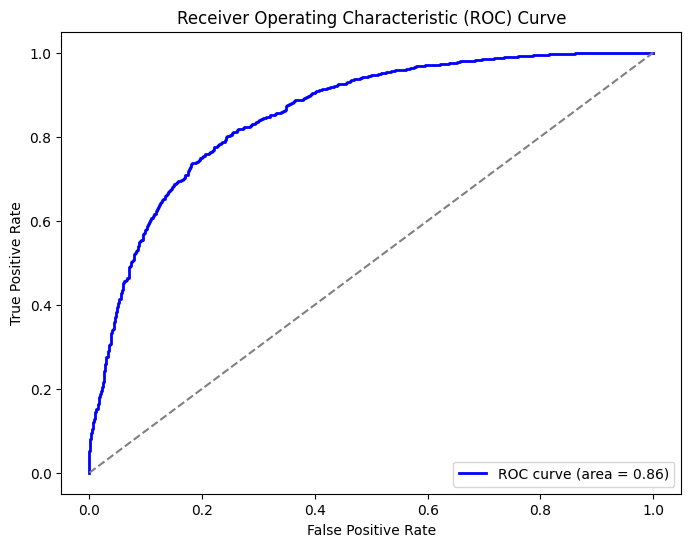

In [309]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonale random
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


In [310]:
threshold = 0.7
y_pred_adjusted = np.where(y_probs > threshold, 1, 0)

print("🔹 XGBoost :")
print(classification_report(y_test, y_pred_adjusted))

🔹 XGBoost :
              precision    recall  f1-score   support

           0       0.88      0.48      0.62      1121
           1       0.71      0.95      0.81      1498

    accuracy                           0.75      2619
   macro avg       0.80      0.71      0.72      2619
weighted avg       0.78      0.75      0.73      2619



## Régression logistique

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Séparer les features et la target
X = df.drop(columns=['click'])
y = df['click']

# Division en train/test (80%-20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Standardiser uniquement pour la Régression Logistique
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

# Initialiser le modèle de régression logistique
log_model = LogisticRegression()

# Entraîner le modèle sur les données normalisées
log_model.fit(X_train_scaled, y_train)

# Prédictions
y_pred_log = log_model.predict(X_test_scaled)

# Évaluation
print("🔹 Régression Logistique Results:")
print(classification_report(y_test, y_pred_log))
print("Accuracy:", accuracy_score(y_test, y_pred_log))
print("Matrice de confusion")
print(confusion_matrix(y_test,y_pred_log))


🔹 Régression Logistique Results:
              precision    recall  f1-score   support

           0       1.00      0.78      0.88    212948
           1       0.02      0.73      0.04      1498

    accuracy                           0.78    214446
   macro avg       0.51      0.76      0.46    214446
weighted avg       0.99      0.78      0.87    214446

Accuracy: 0.781935778704196
Matrice de confusion
[[166582  46366]
 [   397   1101]]


In [65]:
from sklearn.utils import resample
import numpy as np

# Séparer les classes
X_0 = X[y == 0]  # Classe majoritaire (0)
X_1 = X[y == 1]  # Classe minoritaire (1)
y_0 = y[y == 0]
y_1 = y[y == 1]

# Taille cible pour la classe 0 afin d'obtenir 90% de classe 0 et 10% de classe 1
target_size_0 = int(len(y_1) * (55/45))  # 9 fois la taille de la classe 1

# Sous-échantillonnage de la classe 0
X_0_resampled, y_0_resampled = resample(X_0, y_0,
                                        replace=False,  # Pas de remplacement, on réduit la classe 0
                                        n_samples=target_size_0,  # Taille cible pour avoir un ratio 90%-10%
                                        random_state=42)

# Fusion des nouvelles classes équilibrées
X_resampled = np.vstack((X_0_resampled, X_1))
y_resampled = np.concatenate((y_0_resampled, y_1))

# Vérification des proportions
unique, counts = np.unique(y_resampled, return_counts=True)
print("Distribution après sous-échantillonnage :", dict(zip(unique, counts)))


Distribution après sous-échantillonnage : {np.int64(0): np.int64(9153), np.int64(1): np.int64(7489)}


In [66]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


# Division en train/test (80%-20%)
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled)

# Standardiser uniquement pour la Régression Logistique
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialiser le modèle de régression logistique
log_model = LogisticRegression(max_iter=500)

# Entraîner le modèle sur les données normalisées
log_model.fit(X_train_scaled, y_train)

# Prédictions
y_pred_log = log_model.predict(X_test_scaled)

# Évaluation
print("🔹 Régression Logistique Results:")
print(classification_report(y_test, y_pred_log))
print('\n')
print("Matrice de confusion")
print(confusion_matrix(y_test,y_pred_log))


🔹 Régression Logistique Results:
              precision    recall  f1-score   support

           0       0.76      0.83      0.79      1831
           1       0.76      0.67      0.72      1498

    accuracy                           0.76      3329
   macro avg       0.76      0.75      0.75      3329
weighted avg       0.76      0.76      0.76      3329



Matrice de confusion
[[1517  314]
 [ 488 1010]]


In [75]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

X = df.drop(columns=['click'])
y = df['click']

rus = RandomUnderSampler(random_state=0)
X_resampled, y_resampled = rus.fit_resample(X, y)

In [81]:
values, counts = np.unique(y,return_counts=True)
dict(zip(values,counts))


{np.int64(0): np.int64(1064737), np.int64(1): np.int64(7489)}

In [82]:
values, counts = np.unique(y_resampled,return_counts=True)
dict(zip(values,counts))


{np.int64(0): np.int64(7489), np.int64(1): np.int64(7489)}

#### Downsample + weight

In [86]:
np.unique(y, return_counts=True)[1]/len(y)

array([0.99301547, 0.00698453])

**On downsample la classe `0`par un facteur `10`**

In [115]:
from sklearn.utils import resample
import numpy as np

downsampling_factor = 10

# Supposons que `X` et `y` soient vos features et labels
X_0 = X[y == 0]  # Classe majoritaire (0)
y_0 = y[y == 0]

X_1 = X[y == 1]  # Classe minoritaire (1)
y_1 = y[y == 1]

# Nombre de samples après downsampling
N_0_new = len(X_0) // downsampling_factor  # On garde 10% de la classe 0

# Sous-échantillonnage de la classe majoritaire
X_0_resampled, y_0_resampled = resample(X_0, y_0, 
                                        replace=False,  # Pas de duplication
                                        n_samples=N_0_new, 
                                        random_state=42)

# Fusion des deux classes après downsampling
X_resampled = np.vstack((X_0_resampled, X_1))
y_resampled = np.concatenate((y_0_resampled, y_1))

# Vérification des nouvelles proportions
_, counts = np.unique(y_resampled, return_counts=True)
p0, p1 = counts[0], counts[1]
p0 = round(p0/len(y_resampled)*100,2)
p1 = round(p1/len(y_resampled)*100,2)
print(f"Distribution après downsampling : {p0}% de 0 et {p1}% de 1")


Distribution après downsampling : 93.43% de 0 et 6.57% de 1


In [116]:
# Proportions avant et après downsampling
p0_before = 99.3  # Pourcentage initial de la classe 0
p1_before = 0.7   # Pourcentage initial de la classe 1

p0_after = p0  # Proportion après downsampling (calculée précédemment)
p1_after = p1  # Proportion après downsampling

# Calcul des poids
weight_0 = round(p0_before / p0_after, 2)
weight_1 = round(p1_before / p1_after, 2)

print(f"Poids de la classe 0 : {weight_0}")
print(f"Poids de la classe 1 : {weight_1}")


Poids de la classe 0 : 1.06
Poids de la classe 1 : 0.11


In [117]:
# Effectifs après downsampling
N_0_after = len(y_0_resampled)
N_1_after = len(y_1)

# Nouvelles proportions après downsampling
p0_after = N_0_after / (N_0_after + N_1_after)
p1_after = N_1_after / (N_0_after + N_1_after)

# Calcul des poids corrigés (inverse des fréquences)
weight_0 = round(1 / p0_after, 2)
weight_1 = round(1 / p1_after, 2)

print(f"✅ Poids corrigé de la classe 0 : {weight_0}")
print(f"✅ Poids corrigé de la classe 1 : {weight_1}")


✅ Poids corrigé de la classe 0 : 1.07
✅ Poids corrigé de la classe 1 : 15.22


In [118]:
# Division en train/test (80%-20%) avec stratification
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled
)

# Création du vecteur de poids (après split)
weights_train = np.array([weight_0 if y == 0 else weight_1 for y in y_train])

# Vérification
print(f"Nombre d'échantillons dans y_train: {len(y_train)}, Nombre de poids: {len(weights_train)}")


Nombre d'échantillons dans y_train: 91169, Nombre de poids: 91169


In [119]:
# Standardisation des données
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialisation et entraînement du modèle
log_model = LogisticRegression(max_iter=500)
log_model.fit(X_train_scaled, y_train, sample_weight=weights_train)

# Prédictions
y_pred_log = log_model.predict(X_test_scaled)

# Évaluation
print("🔹 Régression Logistique Results:")
print(classification_report(y_test, y_pred_log))

# Matrice de confusion
print("\nMatrice de confusion")
print(confusion_matrix(y_test, y_pred_log))

🔹 Régression Logistique Results:
              precision    recall  f1-score   support

           0       0.98      0.78      0.87     21295
           1       0.20      0.76      0.31      1498

    accuracy                           0.78     22793
   macro avg       0.59      0.77      0.59     22793
weighted avg       0.93      0.78      0.83     22793


Matrice de confusion
[[16649  4646]
 [  366  1132]]


In [156]:
def metrics_report_class_1(class_report : dict):
    precision = round(class_report['1']['precision'], 2)
    recall = round(class_report['1']['recall'], 2)
    F1_score = round(class_report['1']['f1-score'], 2)
    accuracy = round(class_report['accuracy'],2)
    return precision, recall, F1_score, accuracy

In [154]:
def metrics_report_class_0(class_report : dict):
    precision = round(class_report['0']['precision'], 2)
    recall = round(class_report['0']['recall'], 2)
    F1_score = round(class_report['0']['f1-score'], 2)
    accuracy = round(class_report['accuracy'],2)
    return precision, recall, F1_score, accuracy

In [144]:
metrics_report(classification_report(y_test, y_pred_log, output_dict=True))

(0.2, 0.76, 0.31, 0.78)

In [139]:
def evalute_metrics(factors = range(1,3)):
    L_precision = []
    L_recall = []
    L_F1_score = []
    L_accuracy = []
    for downsampling_factor in factors:
        # Supposons que `X` et `y` soient vos features et labels
        X_0 = X[y == 0]  # Classe majoritaire (0)
        y_0 = y[y == 0]

        X_1 = X[y == 1]  # Classe minoritaire (1)
        y_1 = y[y == 1]

        # Nombre de samples après downsampling
        N_0_new = len(X_0) // downsampling_factor  # On garde 10% de la classe 0

        # Sous-échantillonnage de la classe majoritaire
        X_0_resampled, y_0_resampled = resample(X_0, y_0, 
                                                replace=False,  # Pas de duplication
                                                n_samples=N_0_new, 
                                                random_state=42)

        # Fusion des deux classes après downsampling
        X_resampled = np.vstack((X_0_resampled, X_1))
        y_resampled = np.concatenate((y_0_resampled, y_1))

        # Effectifs après downsampling
        N_0_after = len(y_0_resampled)
        N_1_after = len(y_1)

        # Nouvelles proportions après downsampling
        p0_after = N_0_after / (N_0_after + N_1_after)
        p1_after = N_1_after / (N_0_after + N_1_after)

        # Calcul des poids corrigés (inverse des fréquences)
        weight_0 = round(1 / p0_after, 2)
        weight_1 = round(1 / p1_after, 2)
        
        # Division en train/test (80%-20%) avec stratification
        X_train, X_test, y_train, y_test = train_test_split(
            X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled
        )

        # Création du vecteur de poids (après split)
        weights_train = np.array([weight_0 if y == 0 else weight_1 for y in y_train])

        # Standardisation des données
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)

        # Initialisation et entraînement du modèle
        log_model = LogisticRegression(max_iter=500)
        log_model.fit(X_train_scaled, y_train, sample_weight=weights_train)

        # Prédictions
        y_pred_log = log_model.predict(X_test_scaled)

        precision, recall, F1_score, accuracy = metrics_report(classification_report(y_test, y_pred_log, output_dict=True))
        
        print(f'Factor {downsampling_factor} : precision {precision}, recall {recall}, F1_score {F1_score}, accuracy {accuracy}')

In [164]:
L_1 = []
L_0 = []
L = []
for d in range(10,200,10):
    # Supposons que `X` et `y` soient vos features et labels
    X_0 = X[y == 0]  # Classe majoritaire (0)
    y_0 = y[y == 0]

    X_1 = X[y == 1]  # Classe minoritaire (1)
    y_1 = y[y == 1]

    # Nombre de samples après downsampling
    N_0_new = len(X_0) // d  # On garde 10% de la classe 0

    # Sous-échantillonnage de la classe majoritaire
    X_0_resampled, y_0_resampled = resample(X_0, y_0, 
                                            replace=False,  # Pas de duplication
                                            n_samples=N_0_new, 
                                            random_state=42)

    # Fusion des deux classes après downsampling
    X_resampled = np.vstack((X_0_resampled, X_1))
    y_resampled = np.concatenate((y_0_resampled, y_1))

    # Effectifs après downsampling
    N_0_after = len(y_0_resampled)
    N_1_after = len(y_1)

    # Nouvelles proportions après downsampling
    p0_after = N_0_after / (N_0_after + N_1_after)
    p1_after = N_1_after / (N_0_after + N_1_after)

    # Calcul des poids corrigés (inverse des fréquences)
    weight_0 = round(1 / p0_after, 2)
    weight_1 = round(1 / p1_after, 2)

    # Division en train/test (80%-20%) avec stratification
    X_train, X_test, y_train, y_test = train_test_split(
        X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled
    )

    # Création du vecteur de poids (après split)
    weights_train = np.array([weight_0 if y == 0 else weight_1 for y in y_train])

    # Standardisation des données
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Initialisation et entraînement du modèle
    log_model = LogisticRegression(max_iter=500)
    log_model.fit(X_train_scaled, y_train, sample_weight=weights_train)

    # Prédictions
    y_pred_log = log_model.predict(X_test_scaled)

    precision_1, recall_1, F1_score_1, accuracy_1 = metrics_report_class_1(classification_report(y_test, y_pred_log, output_dict=True))
    precision_0, recall_0, F1_score_0, accuracy_0 = metrics_report_class_0(classification_report(y_test, y_pred_log, output_dict=True))
    
    L_1.append(precision_1)
    L_0.append(precision_0)
    L.append(precision_1+precision_0)

    print(f'Factor {d} :')
    print(f'classe 1 : precision {precision_1}, recall {recall_1}, F1_score {F1_score_1}, accuracy {accuracy_1}')
    print(f'classe 0 : precision {precision_0}, recall {recall_0}, F1_score {F1_score_0}, accuracy {accuracy_0}')

Factor 10 :
classe 1 : precision 0.2, recall 0.76, F1_score 0.31, accuracy 0.78
classe 0 : precision 0.98, recall 0.78, F1_score 0.87, accuracy 0.78
Factor 20 :
classe 1 : precision 0.32, recall 0.76, F1_score 0.45, accuracy 0.77
classe 0 : precision 0.96, recall 0.78, F1_score 0.86, accuracy 0.77
Factor 30 :
classe 1 : precision 0.42, recall 0.77, F1_score 0.54, accuracy 0.77
classe 0 : precision 0.94, recall 0.78, F1_score 0.85, accuracy 0.77
Factor 40 :
classe 1 : precision 0.49, recall 0.75, F1_score 0.59, accuracy 0.77
classe 0 : precision 0.92, recall 0.78, F1_score 0.84, accuracy 0.77
Factor 50 :
classe 1 : precision 0.56, recall 0.77, F1_score 0.65, accuracy 0.78
classe 0 : precision 0.91, recall 0.78, F1_score 0.84, accuracy 0.78
Factor 60 :
classe 1 : precision 0.6, recall 0.76, F1_score 0.67, accuracy 0.78
classe 0 : precision 0.89, recall 0.79, F1_score 0.83, accuracy 0.78
Factor 70 :
classe 1 : precision 0.62, recall 0.75, F1_score 0.68, accuracy 0.77
classe 0 : precision 

In [161]:
import matplotlib.pyplot as plt

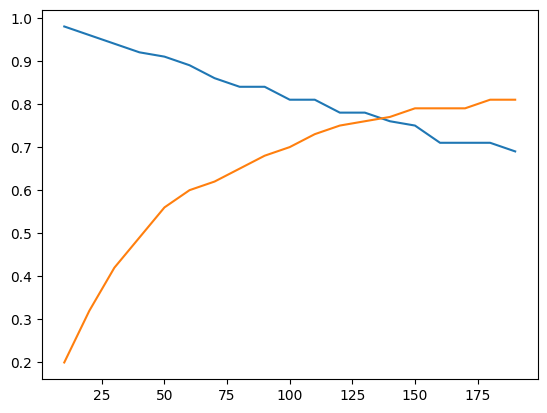

In [163]:
plt.plot(range(10,200,10), L_0)
plt.plot(range(10,200,10), L_1)

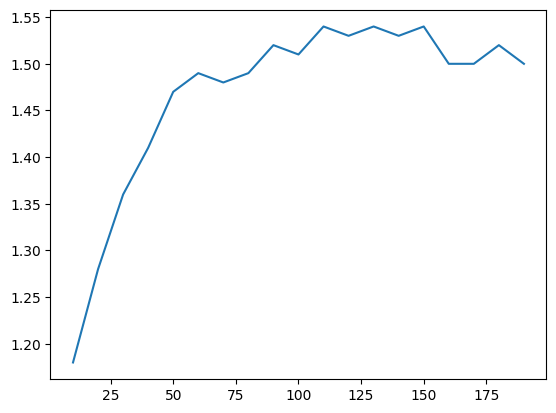

In [165]:
plt.plot(range(10,200,10), L)

In [169]:
L_1 = []
L_0 = []
L = []

for d in range(10, 200, 10):
    print(f"\n🔹 Factor {d} - Downsampling en cours...")

    # Séparer les classes
    X_0, y_0 = X[y == 0], y[y == 0]  # Classe majoritaire
    X_1, y_1 = X[y == 1], y[y == 1]  # Classe minoritaire

    # Downsampling de la classe 0
    N_0_new = len(X_0) // d  # Réduction de la classe majoritaire
    X_0_resampled, y_0_resampled = resample(X_0, y_0, replace=False, n_samples=N_0_new, random_state=42)

    # Fusion des deux classes après downsampling
    X_resampled = np.vstack((X_0_resampled, X_1))
    y_resampled = np.concatenate((y_0_resampled, y_1))

    # Vérification des nouvelles proportions
    N_0_after, N_1_after = len(y_0_resampled), len(y_1)
    p0_after = N_0_after / (N_0_after + N_1_after)
    p1_after = N_1_after / (N_0_after + N_1_after)

    # Calcul des poids corrigés
    weight_0, weight_1 = round(1 / p0_after, 2), round(1 / p1_after, 2)

    # Division en train/test avec stratification
    X_train, X_test, y_train, y_test = train_test_split(
        X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled
    )

    # Création du vecteur de poids
    weights_train = np.array([weight_0 if y == 0 else weight_1 for y in y_train])

    # Normalisation des features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Initialisation du modèle XGBoost
    xgb_model = XGBClassifier(
        objective="binary:logistic",
        n_estimators=100,
        learning_rate=0.1,
        max_depth=5,
        scale_pos_weight=weight_1 / weight_0,  # Correction de l'équilibre des classes
        use_label_encoder=False,
        eval_metric="logloss"
    )

    # Entraînement du modèle avec pondération
    xgb_model.fit(X_train_scaled, y_train, sample_weight=weights_train)

    # Prédictions
    y_pred_xgb = xgb_model.predict(X_test_scaled)

    # Extraction des métriques
    report = classification_report(y_test, y_pred_xgb, output_dict=True)

    precision_1, recall_1, F1_score_1, accuracy_1 = (
        round(report["1"]["precision"], 2),
        round(report["1"]["recall"], 2),
        round(report["1"]["f1-score"], 2),
        round(report["accuracy"], 2),
    )

    precision_0, recall_0, F1_score_0, accuracy_0 = (
        round(report["0"]["precision"], 2),
        round(report["0"]["recall"], 2),
        round(report["0"]["f1-score"], 2),
        round(report["accuracy"], 2),
    )

    # Stockage des métriques
    L_1.append(precision_1)
    L_0.append(precision_0)
    L.append(precision_1 + precision_0)

    # Affichage des résultats
    print(f"🔹 Classe 1 : Precision={precision_1}, Recall={recall_1}, F1-score={F1_score_1}, Accuracy={accuracy_1}")
    print(f"🔹 Classe 0 : Precision={precision_0}, Recall={recall_0}, F1-score={F1_score_0}, Accuracy={accuracy_0}")




🔹 Factor 10 - Downsampling en cours...


[22:35:39] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.



🔹 Classe 1 : Precision=0.1, Recall=0.98, F1-score=0.18, Accuracy=0.41
🔹 Classe 0 : Precision=1.0, Recall=0.36, F1-score=0.53, Accuracy=0.41

🔹 Factor 20 - Downsampling en cours...


[22:35:42] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.



🔹 Classe 1 : Precision=0.19, Recall=0.97, F1-score=0.32, Accuracy=0.49
🔹 Classe 0 : Precision=0.99, Recall=0.42, F1-score=0.59, Accuracy=0.49

🔹 Factor 30 - Downsampling en cours...


[22:35:43] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.



🔹 Classe 1 : Precision=0.28, Recall=0.97, F1-score=0.43, Accuracy=0.56
🔹 Classe 0 : Precision=0.99, Recall=0.47, F1-score=0.64, Accuracy=0.56

🔹 Factor 40 - Downsampling en cours...


[22:35:44] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.



🔹 Classe 1 : Precision=0.36, Recall=0.95, F1-score=0.53, Accuracy=0.62
🔹 Classe 0 : Precision=0.97, Recall=0.53, F1-score=0.69, Accuracy=0.62

🔹 Factor 50 - Downsampling en cours...


[22:35:45] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.



🔹 Classe 1 : Precision=0.43, Recall=0.94, F1-score=0.59, Accuracy=0.66
🔹 Classe 0 : Precision=0.97, Recall=0.57, F1-score=0.71, Accuracy=0.66

🔹 Factor 60 - Downsampling en cours...


[22:35:46] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.



🔹 Classe 1 : Precision=0.5, Recall=0.93, F1-score=0.65, Accuracy=0.7
🔹 Classe 0 : Precision=0.95, Recall=0.61, F1-score=0.74, Accuracy=0.7

🔹 Factor 70 - Downsampling en cours...


[22:35:47] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.



🔹 Classe 1 : Precision=0.54, Recall=0.92, F1-score=0.68, Accuracy=0.71
🔹 Classe 0 : Precision=0.94, Recall=0.61, F1-score=0.74, Accuracy=0.71

🔹 Factor 80 - Downsampling en cours...


[22:35:48] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.



🔹 Classe 1 : Precision=0.59, Recall=0.89, F1-score=0.71, Accuracy=0.73
🔹 Classe 0 : Precision=0.91, Recall=0.65, F1-score=0.76, Accuracy=0.73

🔹 Factor 90 - Downsampling en cours...


[22:35:49] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.



🔹 Classe 1 : Precision=0.63, Recall=0.89, F1-score=0.74, Accuracy=0.76
🔹 Classe 0 : Precision=0.91, Recall=0.67, F1-score=0.77, Accuracy=0.76

🔹 Factor 100 - Downsampling en cours...


[22:35:49] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.



🔹 Classe 1 : Precision=0.66, Recall=0.87, F1-score=0.75, Accuracy=0.76
🔹 Classe 0 : Precision=0.88, Recall=0.69, F1-score=0.77, Accuracy=0.76

🔹 Factor 110 - Downsampling en cours...


[22:35:50] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.



🔹 Classe 1 : Precision=0.68, Recall=0.87, F1-score=0.76, Accuracy=0.77
🔹 Classe 0 : Precision=0.87, Recall=0.69, F1-score=0.77, Accuracy=0.77

🔹 Factor 120 - Downsampling en cours...


[22:35:51] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.



🔹 Classe 1 : Precision=0.73, Recall=0.84, F1-score=0.78, Accuracy=0.78
🔹 Classe 0 : Precision=0.85, Recall=0.73, F1-score=0.78, Accuracy=0.78

🔹 Factor 130 - Downsampling en cours...


[22:35:52] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.



🔹 Classe 1 : Precision=0.74, Recall=0.85, F1-score=0.79, Accuracy=0.79
🔹 Classe 0 : Precision=0.84, Recall=0.73, F1-score=0.78, Accuracy=0.79

🔹 Factor 140 - Downsampling en cours...


[22:35:53] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.



🔹 Classe 1 : Precision=0.76, Recall=0.82, F1-score=0.79, Accuracy=0.78
🔹 Classe 0 : Precision=0.8, Recall=0.75, F1-score=0.78, Accuracy=0.78

🔹 Factor 150 - Downsampling en cours...


[22:35:53] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.



🔹 Classe 1 : Precision=0.78, Recall=0.79, F1-score=0.78, Accuracy=0.78
🔹 Classe 0 : Precision=0.78, Recall=0.76, F1-score=0.77, Accuracy=0.78

🔹 Factor 160 - Downsampling en cours...


[22:35:54] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.



🔹 Classe 1 : Precision=0.8, Recall=0.76, F1-score=0.78, Accuracy=0.77
🔹 Classe 0 : Precision=0.75, Recall=0.78, F1-score=0.76, Accuracy=0.77

🔹 Factor 170 - Downsampling en cours...


[22:35:55] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.



🔹 Classe 1 : Precision=0.8, Recall=0.77, F1-score=0.78, Accuracy=0.77
🔹 Classe 0 : Precision=0.73, Recall=0.77, F1-score=0.75, Accuracy=0.77

🔹 Factor 180 - Downsampling en cours...


[22:35:56] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.



🔹 Classe 1 : Precision=0.83, Recall=0.77, F1-score=0.8, Accuracy=0.78
🔹 Classe 0 : Precision=0.73, Recall=0.79, F1-score=0.76, Accuracy=0.78

🔹 Factor 190 - Downsampling en cours...


[22:35:56] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.



🔹 Classe 1 : Precision=0.83, Recall=0.76, F1-score=0.8, Accuracy=0.78
🔹 Classe 0 : Precision=0.71, Recall=0.79, F1-score=0.75, Accuracy=0.78


In [168]:
from xgboost import XGBClassifier

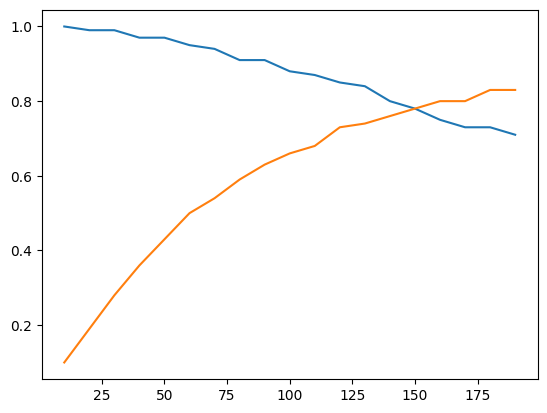

In [170]:
plt.plot(range(10,200,10), L_0)
plt.plot(range(10,200,10), L_1)

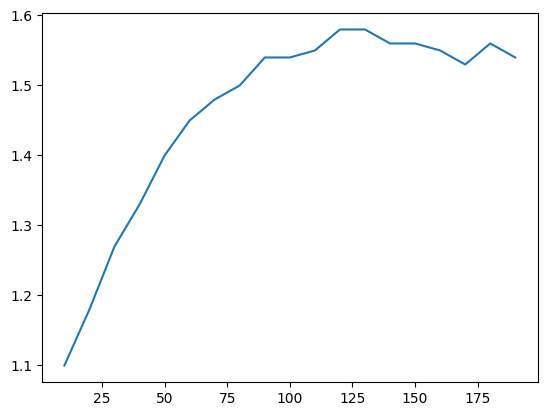

In [171]:
plt.plot(range(10,200,10), L)

In [172]:
# Séparer les classes
X_0, y_0 = X[y == 0], y[y == 0]  # Classe majoritaire
X_1, y_1 = X[y == 1], y[y == 1]  # Classe minoritaire

# Downsampling de la classe 0
N_0_new = len(X_0) // 125  # Réduction de la classe majoritaire
X_0_resampled, y_0_resampled = resample(X_0, y_0, replace=False, n_samples=N_0_new, random_state=42)

# Fusion des deux classes après downsampling
X_resampled = np.vstack((X_0_resampled, X_1))
y_resampled = np.concatenate((y_0_resampled, y_1))

# Vérification des nouvelles proportions
N_0_after, N_1_after = len(y_0_resampled), len(y_1)
p0_after = N_0_after / (N_0_after + N_1_after)
p1_after = N_1_after / (N_0_after + N_1_after)

In [173]:
p0_after

0.5321129576408846

In [174]:
p1_after

0.4678870423591153